In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.16.1'

 Data Preprocessing

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2054 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'foriegners': 0, 'indians': 1}

Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 908 images belonging to 2 classes.


Part 2 - Building the CNN
### Initialising the CNN


In [8]:
cnn = tf.keras.models.Sequential()

Step 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

D:\conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 2 - Pooling

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second convolutional layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a third convolutional layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Step 3 - Flattening

In [14]:
cnn.add(tf.keras.layers.Flatten())

Step 4 - Full Connection

1st dense layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

2nd dense layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

Step 5 - Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Part 3 - Training the CNN

Compiling the CNN

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the CNN on the Training set and evaluating it on the Test set

In [19]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 50)

Epoch 1/50


D:\conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 58s 759ms/step - accuracy: 0.5624 - loss: 0.6884 - val_accuracy: 0.5022 - val_loss: 0.7338
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 717ms/step - accuracy: 0.6031 - loss: 0.6690 - val_accuracy: 0.5352 - val_loss: 0.6880
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 48s 694ms/step - accuracy: 0.5772 - loss: 0.6695 - val_accuracy: 0.5463 - val_loss: 0.6977
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 721ms/step - accuracy: 0.5951 - loss: 0.6620 - val_accuracy: 0.5352 - val_loss: 0.6960
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 49s 688ms/step - accuracy: 0.6222 - loss: 0.6577 - val_accuracy: 0.5363 - val_loss: 0.7253
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 48s 677ms/step - accuracy: 0.6224 - loss: 0.6379 - val_accuracy: 0.5396 - val_loss: 0.7008
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 48s 673ms/step - accuracy: 0.6235 - loss: 0.6395 - val_accuracy: 0.5672 - val_loss: 0.6875
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 47s 674ms/step - accuracy: 0.6763 - loss: 0.6087 - val_accuracy: 0.550

SAVEthe model

In [22]:
# Save the model to disk with the .keras extension
cnn.save("TRAIN_MODEL.keras")
print("Saved model to disk")


Saved model to disk


In [23]:
from numpy import loadtxt
from keras.models import load_model

In [24]:
# load model
cnn = load_model("TRAIN_MODEL.keras")
# summarize model.
cnn.summary()

# split into input and output variables

# evaluate the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 525,893 (2.01 MB)

 Trainable params: 175,297 (684.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 350,596 (1.34 MB)

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
!pip install --upgrade tensorflow


In [33]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 908 images belonging to 2 classes.


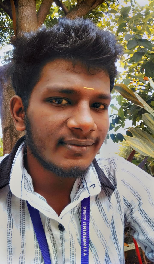

In [39]:
test_image = tf.keras.utils.load_img('sree.jpg', target_size = (264, 154))
test_image

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the CNN model
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),  # Flatten the output before passing to Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Load the trained model weights if available
# cnn.load_weights('TRAIN_MODEL.h5')  # or 'TRAIN_MODEL.keras'

# Load and preprocess the test image
test_image_path = 'sree.jpg'  # Update this path
test_image = image.load_img(test_image_path, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

# Ensure the input shape matches
print("Model input shape:", cnn.input_shape)
print("Test image shape:", test_image.shape)

# Make a prediction
result = cnn.predict(test_image)

# Interpret the prediction
class_indices = {'Foreigner': 0, 'Indian': 1}  # Ensure this matches your class_indices
if result[0][0] <= 0.5:
    prediction = 'Foreigner'
else:
    prediction = 'Indian'

print(prediction)


Model input shape: (None, 150, 150, 3)
Test image shape: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Indian


In [46]:
result[0][0]

0.50046647